In [1]:
import pandas as pd

dataset = pd.read_csv("files/input/auto_mpg.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [2]:
dataset.shape

(398, 8)

In [3]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset["Origin"] = dataset["Origin"].map(
    {1: "USA", 2: "Europe", 3: "Japan"},
)

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [6]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [7]:
train_dataset = dataset.sample(frac=0.8, random_state=11)
test_dataset = dataset.drop(train_dataset.index) 

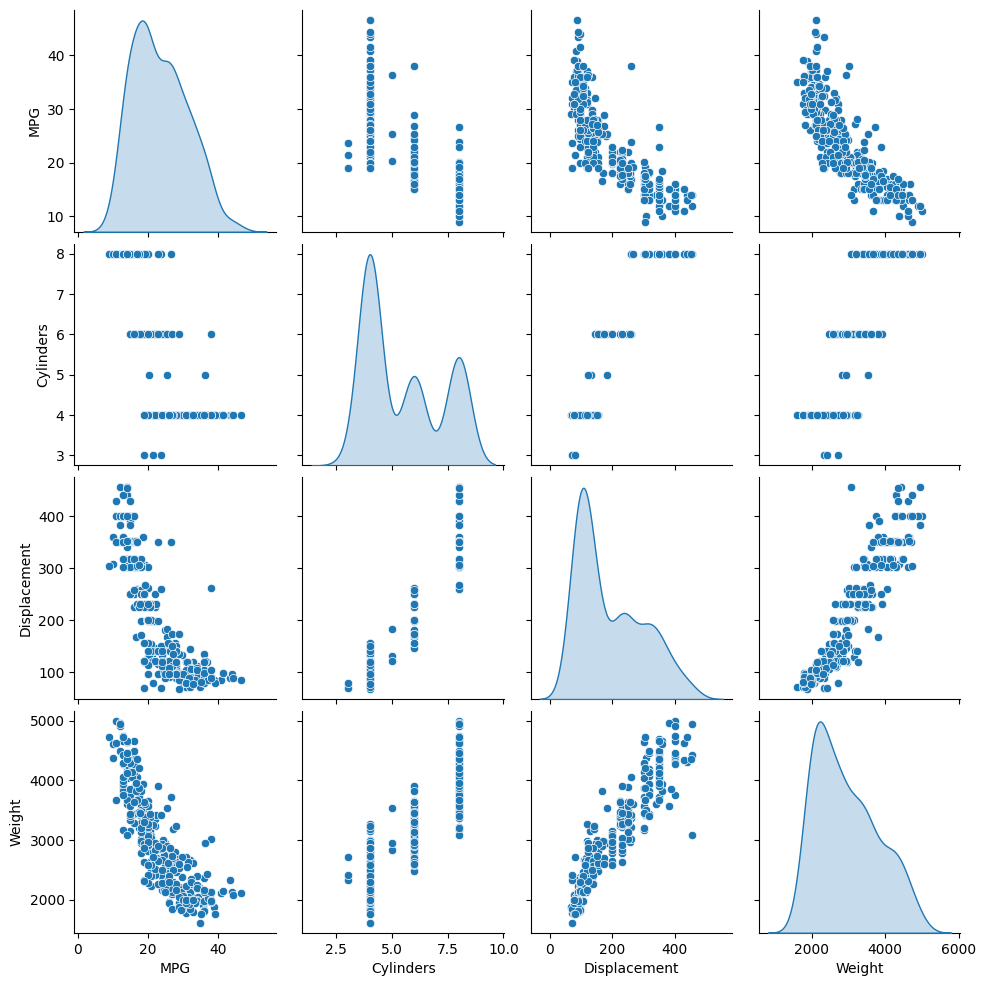

In [8]:
import seaborn as sns  

sns.pairplot(
    train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde"
)

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.573248,7.783052,9.0,17.60,22.2,29.000,46.6
Cylinders,314.0,5.471338,1.701570,3.0,4.00,4.0,8.000,8.0
Displacement,314.0,194.062102,105.480992,68.0,98.00,146.0,262.000,455.0
Horsepower,314.0,103.847134,39.070701,46.0,75.00,92.0,121.500,230.0
Weight,314.0,2959.031847,843.317547,1613.0,2223.75,2792.5,3556.000,4997.0
Acceleration,314.0,15.604777,2.838700,8.0,14.00,15.5,17.375,24.8
Model Year,314.0,76.063694,3.722278,70.0,73.00,76.0,79.000,82.0


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [11]:
train_dataset.describe().transpose()[["mean", "std"]]

,mean,std
MPG,23.573248,7.783052
Cylinders,5.471338,1.701570
Displacement,194.062102,105.480992
Horsepower,103.847134,39.070701
Weight,2959.031847,843.317547
Acceleration,15.604777,2.838700
Model Year,76.063694,3.722278


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pd.DataFrame(
    data=scaler.fit_transform(train_dataset),
    columns=train_dataset.columns,
).describe().transpose()[["mean", "std"]]

,mean,std
MPG,-3.960031e-17,1.001596
Cylinders,-1.626441e-16,1.001596
Displacement,-8.061492e-17,1.001596
Horsepower,-4.384320e-17,1.001596
Weight,2.305304e-16,1.001596
Acceleration,1.357725e-16,1.001596
Model Year,-1.052237e-15,1.001596
Europe,5.657187e-18,1.001596
Japan,3.960031e-17,1.001596
USA,4.525750e-17,1.001596


In [13]:
horsepower_scaler = StandardScaler()

train_horsepower = train_features[["Horsepower"]]
test_horsepower = test_features[["Horsepower"]]

horsepower_scaler.fit(train_horsepower)

standarized_train_horsepower = horsepower_scaler.transform(train_horsepower)
standarized_test_horsepower = horsepower_scaler.transform(test_horsepower)

In [14]:
from sklearn.linear_model import LinearRegression

horsepower_model = LinearRegression()
horsepower_model.fit(standarized_train_horsepower, train_labels)

LinearRegression()

In [15]:
horsepower_model.intercept_

23.573248407643312

In [16]:
import numpy as np

x = pd.DataFrame({"Horsepower": np.linspace(0, 250, 251)})
x.head()

,Horsepower
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


In [17]:
scaled_x = horsepower_scaler.transform(x)
y = horsepower_model.predict(scaled_x)
y[:5]

array([39.64803304, 39.49324027, 39.33844751, 39.18365475, 39.02886199])

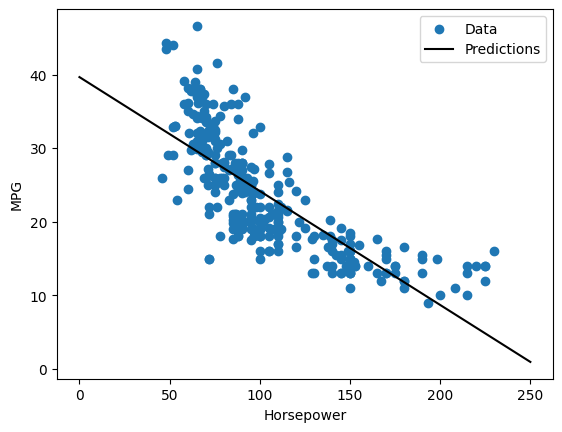

In [18]:
import matplotlib.pyplot as plt


def plot_horsepower(x, y):
    plt.scatter(train_features["Horsepower"], train_labels, label="Data")
    plt.plot(x, y, color="k", label="Predictions")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.legend()
    
    
    
# ---


plot_horsepower(x, y)

In [19]:
from sklearn.metrics import mean_squared_error

test_results = {}

y_pred = horsepower_model.predict(standarized_test_horsepower)

test_results["horsepower_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results["horsepower_model"] = float(test_results["horsepower_model"])

test_results

{'horsepower_model': 24.10152627273865}

In [20]:
#
# Preparación de la data
#
features_scaler = StandardScaler()

features_scaler.fit(train_features)

standarized_train_features = features_scaler.transform(train_features)
standarized_test_features = features_scaler.transform(test_features)

In [21]:
linear_model = LinearRegression()
linear_model.fit(standarized_train_features, train_labels)

LinearRegression()

In [22]:
linear_model.intercept_

23.573248407643316

In [23]:
linear_model.coef_

array([-0.78052768,  2.28797534, -0.46275795, -5.719943  ,  0.30797091,
        2.82367406,  0.46885053,  0.46867691, -0.75561747])

In [24]:
def plot_predictions(y_true, y_pred):

    ax = plt.axes(aspect="equal")
    plt.scatter(y_true, y_pred)
    plt.xlabel("True Values [MPG]")
    plt.ylabel("Predictions [MPG]")
    lims = [0, 50]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

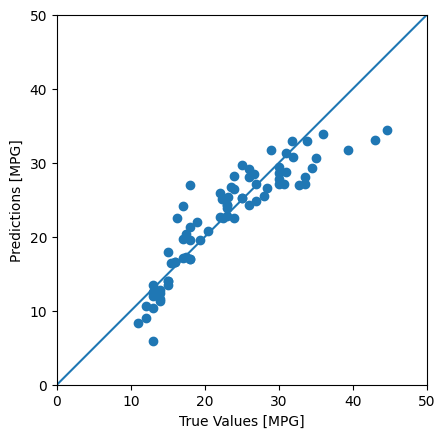

In [25]:
test_predictions = linear_model.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)

In [26]:
test_results["linear_model"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

{'horsepower_model': 24.10152627273865, 'linear_model': 11.58934699844551}

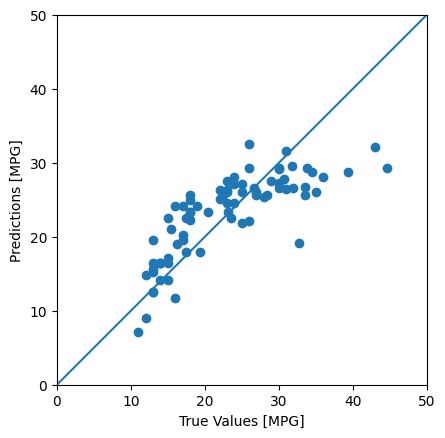

In [27]:
plot_predictions(
    y_true=test_labels,
    y_pred=horsepower_model.predict(standarized_test_horsepower),
)

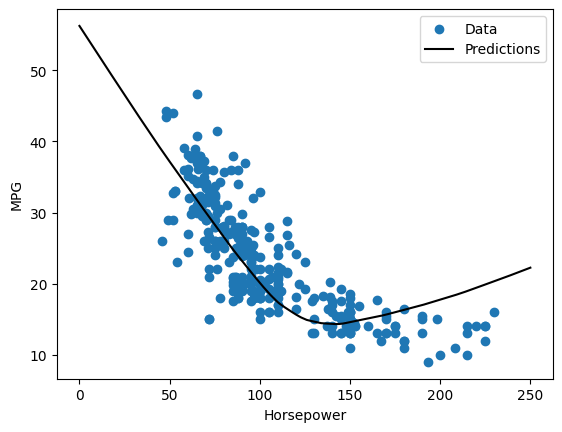

In [28]:
from sklearn.neural_network import MLPRegressor

mlp_horsepower = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp_horsepower.fit(standarized_train_horsepower, train_labels)

y = mlp_horsepower.predict(scaled_x)
plot_horsepower(x, y)

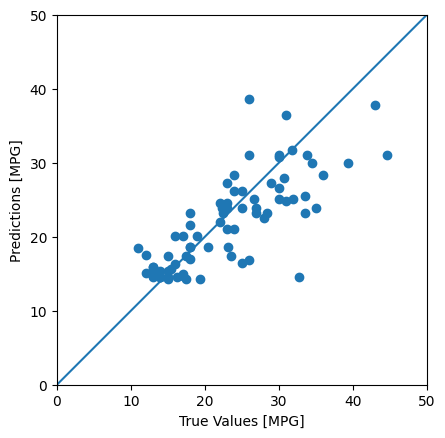

In [29]:
plot_predictions(
    y_true=test_labels,
    y_pred=mlp_horsepower.predict(
        standarized_test_horsepower,
    ),
)

In [30]:
y_pred = mlp_horsepower.predict(standarized_test_horsepower)

test_results["mlp_horsepower"] = mean_squared_error(
    y_true=test_labels,
    y_pred=y_pred,
)

test_results

{'horsepower_model': 24.10152627273865,
 'linear_model': 11.58934699844551,
 'mlp_horsepower': 25.33858278349174}

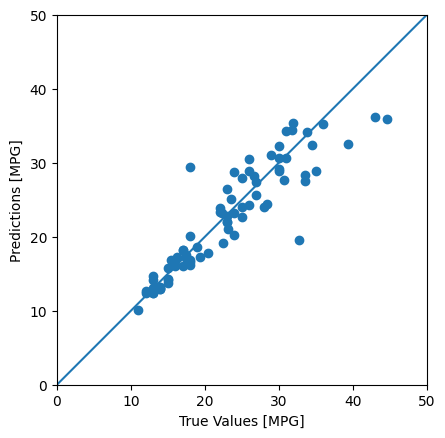

In [31]:
mlp = MLPRegressor(
    max_iter=10000,
    hidden_layer_sizes=(64, 64),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    validation_fraction=0.2,
    early_stopping=True,
    random_state=0,
)
mlp.fit(standarized_train_features, train_labels)




test_predictions = mlp.predict(standarized_test_features)

plot_predictions(
    y_true=test_labels,
    y_pred=test_predictions,
)

In [32]:
test_results["mlp"] = mean_squared_error(
    y_true=test_labels,
    y_pred=test_predictions,
)

test_results

{'horsepower_model': 24.10152627273865,
 'linear_model': 11.58934699844551,
 'mlp_horsepower': 25.33858278349174,
 'mlp': 10.668187812910936}

In [33]:
pd.DataFrame(test_results, index=["Mean squared error [MPG]"]).T


,Mean squared error [MPG]
horsepower_model,24.101526
linear_model,11.589347
mlp_horsepower,25.338583
mlp,10.668188


In [34]:
import pickle

with open("mlp.pickle", "wb") as file:
    pickle.dump(mlp, file)

with open("features_scaler.pickle", "wb") as file:
    pickle.dump(features_scaler, file)